In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

In [2]:
data = pd.read_csv('Fraud.csv')

In [3]:
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
#Filling up missing values for merchant transactions

data['oldbalanceDest'] = np.where(data['nameDest'].str.startswith("M"), data['oldbalanceDest'].median()
, data['oldbalanceDest'])

In [5]:
#Filling up subsequent missing values for newbalance

data['newbalanceDest'] = np.where(data['nameDest'].str.startswith("M"), data['oldbalanceDest'] + data['amount']
, data['newbalanceDest'])

In [6]:
#Dropping names because missing values have been filled and they do not ascertain if a transaction is fraud

data.drop(columns = ['nameOrig', 'nameDest'], axis=1, inplace=True)

In [7]:
data.head(20)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,132705.665,142545.305,0,0
1,1,PAYMENT,1864.28,21249.00,19384.72,132705.665,134569.945,0,0
2,1,TRANSFER,181.00,181.00,0.00,0.000,0.000,1,0
3,1,CASH_OUT,181.00,181.00,0.00,21182.000,0.000,1,0
4,1,PAYMENT,11668.14,41554.00,29885.86,132705.665,144373.805,0,0
5,1,PAYMENT,7817.71,53860.00,46042.29,132705.665,140523.375,0,0
6,1,PAYMENT,7107.77,183195.00,176087.23,132705.665,139813.435,0,0
7,1,PAYMENT,7861.64,176087.23,168225.59,132705.665,140567.305,0,0
8,1,PAYMENT,4024.36,2671.00,0.00,132705.665,136730.025,0,0
9,1,DEBIT,5337.77,41720.00,36382.23,41898.000,40348.790,0,0


In [8]:
#Encoding nominal data

encoded_data = pd.get_dummies(data, columns = ['type'])

In [9]:
encoded_data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,132705.665,142545.305,0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,132705.665,134569.945,0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.000,0.000,1,0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.000,0.000,1,0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,132705.665,144373.805,0,0,0,0,0,1,0


In [10]:
encoded_data.isnull().values.any()


False

Text(0, 0.5, 'Frequency')

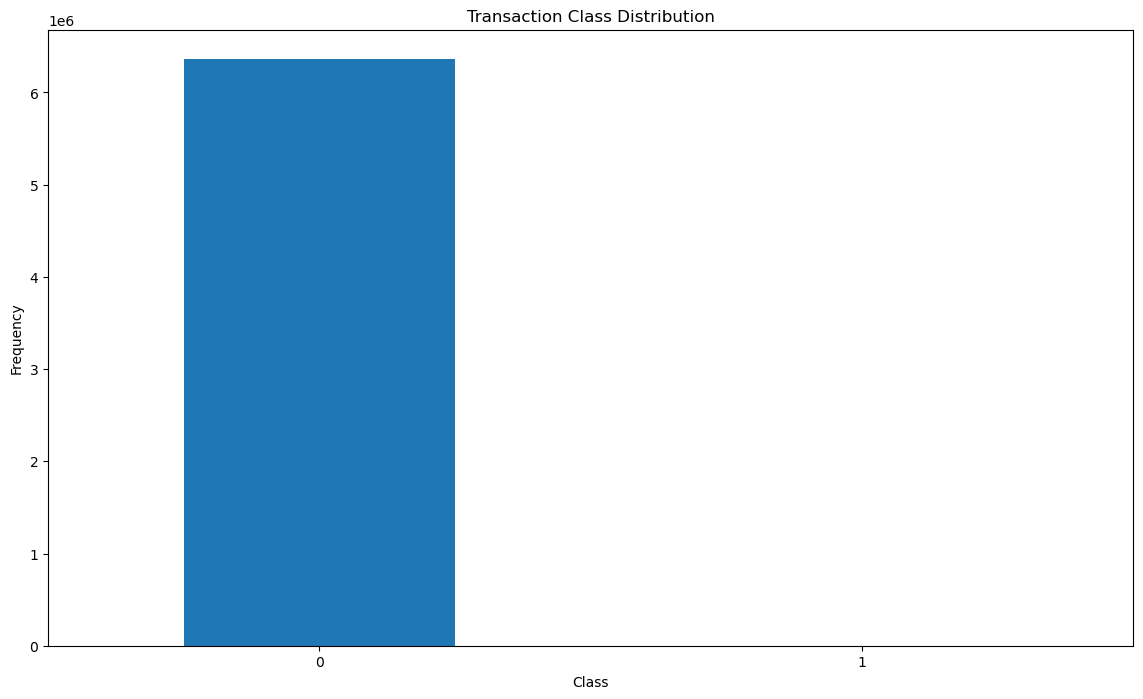

In [11]:
#comparing number of fraud transactions in comparison with normal transactions

count_classes = pd.value_counts(encoded_data['isFlaggedFraud'
], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2))

plt.xlabel("Class")

plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

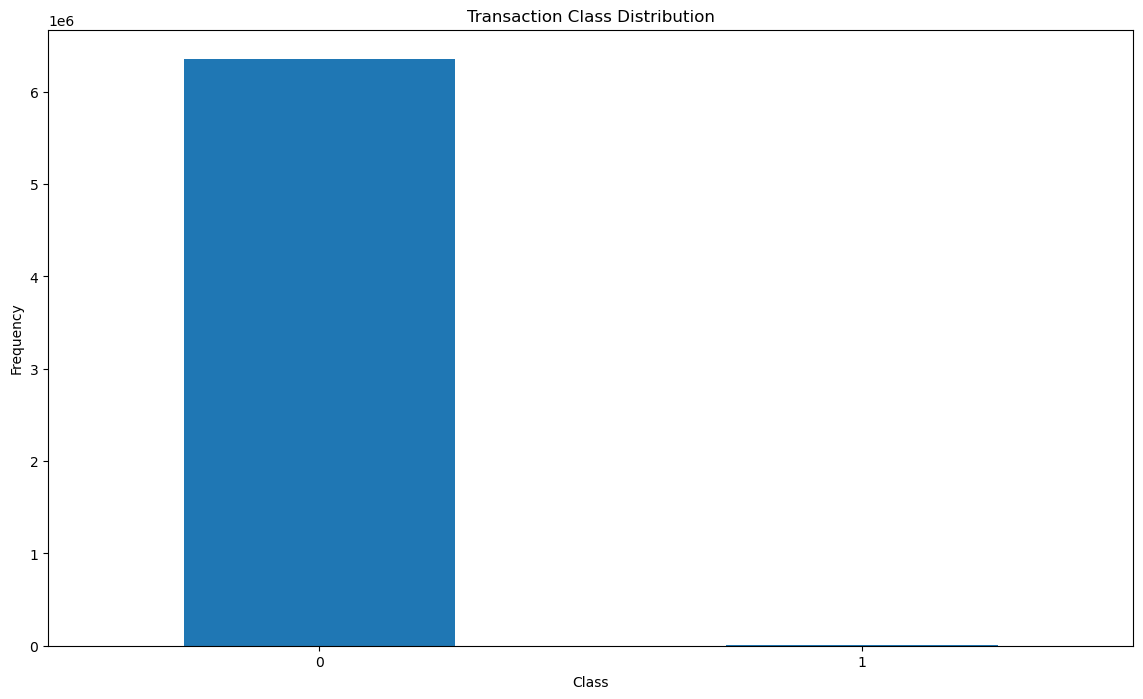

In [12]:
count_classes = pd.value_counts(encoded_data['isFraud'
], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2))

plt.xlabel("Class")

plt.ylabel("Frequency")

In [13]:
fraud = encoded_data[encoded_data['isFraud']==1]


In [14]:
normal = encoded_data[encoded_data['isFraud']==0]


In [15]:
print(fraud.shape,normal.shape)


(8213, 13) (6354407, 13)


In [16]:
fraud.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
count,8213.000000,8.213000e+03,8.213000e+03,8.213000e+03,8.213000e+03,8.213000e+03,8213.0,8213.000000,8213.0,8213.000000,8213.0,8213.0,8213.000000
mean,368.413856,1.467967e+06,1.649668e+06,1.923926e+05,5.442496e+05,1.279708e+06,1.0,0.001948,0.0,0.501157,0.0,0.0,0.498843
std,216.388690,2.404253e+06,3.547719e+06,1.965666e+06,3.336421e+06,3.908817e+06,0.0,0.044097,0.0,0.500029,0.0,0.0,0.500029
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
25%,181.000000,1.270913e+05,1.258224e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
50%,367.000000,4.414234e+05,4.389835e+05,0.000000e+00,0.000000e+00,4.676420e+03,1.0,0.000000,0.0,1.000000,0.0,0.0,0.000000
75%,558.000000,1.517771e+06,1.517771e+06,0.000000e+00,1.478287e+05,1.058725e+06,1.0,0.000000,0.0,1.000000,0.0,0.0,1.000000
max,743.000000,1.000000e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.0,1.000000,0.0,1.000000,0.0,0.0,1.000000


In [17]:
normal.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
count,6.354407e+06,6.354407e+06,6.354407e+06,6.354407e+06,6.354407e+06,6.354407e+06,6354407.0,6354407.0,6.354407e+06,6.354407e+06,6.354407e+06,6.354407e+06,6.354407e+06
mean,2.432357e+02,1.781970e+05,8.328287e+05,8.559702e+05,1.146353e+06,1.274279e+06,0.0,0.0,2.202069e-01,3.514701e-01,6.520199e-03,3.385831e-01,8.321972e-02
std,1.421402e+02,5.962370e+05,2.887144e+06,2.924987e+06,3.385194e+06,3.657981e+06,0.0,0.0,4.143861e-01,4.774295e-01,8.048408e-02,4.732279e-01,2.762141e-01
min,1.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.336840e+04,0.000000e+00,0.000000e+00,1.327057e+05,1.395953e+05,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.468472e+04,1.406900e+04,0.000000e+00,1.333118e+05,2.159529e+05,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.340000e+02,2.083648e+05,1.069695e+05,1.447307e+05,9.441446e+05,1.111975e+06,0.0,0.0,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,7.180000e+02,9.244552e+07,4.381886e+07,4.368662e+07,3.560159e+08,3.561793e+08,0.0,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


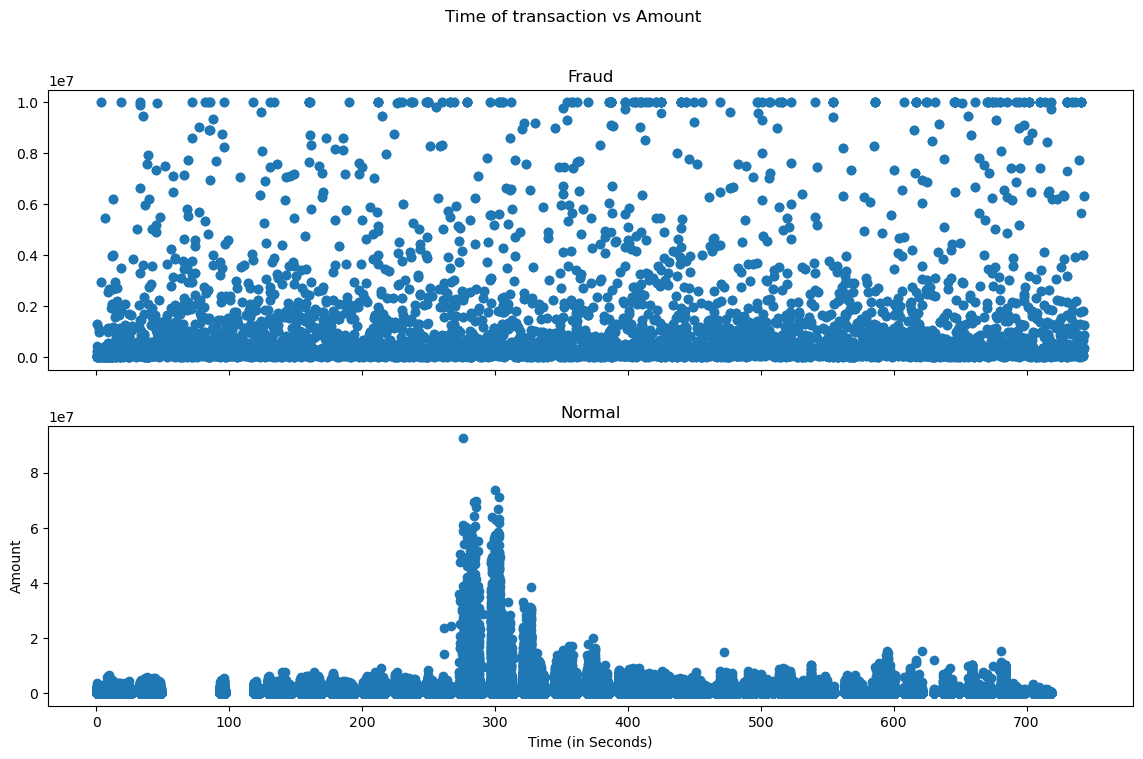

In [18]:
#Checking to see if fraud transactions happen more at any particular time

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount')
ax1.scatter(fraud.step, fraud.amount)
ax1.set_title('Fraud')
ax2.scatter(normal.step, normal.amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()


In [19]:
#Taking a sample of the data to reduce computational time

data1= encoded_data.sample(frac = 0.1,random_state=1)

data1.shape

(636262, 13)

In [20]:
encoded_data.shape

(6362620, 13)

In [21]:
#Determining the number of fraud and valid transactions in the dataset

Fraud = data1[data1['isFraud']==1]

Valid = data1[data1['isFraud']==0]

In [22]:
outlier_fraction = len(Fraud)/float(len(Valid))

In [23]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.0012888646188564514
Fraud Cases : 819
Valid Cases : 635443


In [24]:
#getting correlations of each features in dataset

corrmat = data1.corr()
print(corrmat)

                    step    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000  0.022690      -0.011070       -0.011208   
amount          0.022690  1.000000      -0.002931       -0.007762   
oldbalanceOrg  -0.011070 -0.002931       1.000000        0.998855   
newbalanceOrig -0.011208 -0.007762       0.998855        1.000000   
oldbalanceDest  0.026653  0.294713       0.065062        0.066603   
newbalanceDest  0.024941  0.462385       0.039767        0.039462   
isFraud         0.032236  0.072849       0.009412       -0.007870   
isFlaggedFraud       NaN       NaN            NaN             NaN   
type_CASH_IN    0.002820 -0.010031       0.506827        0.527365   
type_CASH_OUT  -0.013384 -0.003475      -0.201415       -0.211504   
type_DEBIT      0.002067 -0.023911      -0.021521       -0.021945   
type_PAYMENT    0.006228 -0.201136      -0.189457       -0.193891   
type_TRANSFER   0.007625  0.371533      -0.081679       -0.087337   

                oldbalanceDest  n

In [25]:
#Creating independent and Dependent Features

columns = data1.columns.tolist()

# Filtering the columns to remove data 

columns = [c for c in columns if c not in ["isFraud"]]

# Storing the variables we are predicting 

target = "isFraud"

# Defining a random state 

state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))

# Printing the shapes of X & Y

print(X.shape)
print(Y.shape)

(636262, 12)
(636262,)


In [29]:
#Defining the outlier detection methods
#These classifiers were chosen because they are very good with data that has outliers

classifiers = {
    
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                                 p=2, metric_params=None, contamination=outlier_fraction),

   
}

In [27]:
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    
    #Fitting the data and tagging the outliers
    
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_

    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
 


C:\Users\Ghostdog17\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [28]:
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    
    # Running Classification Metrics
    
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

Local Outlier Factor: 1612
Accuracy Score :
0.9974664524991277
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    635443
           1       0.02      0.02      0.02       819

    accuracy                           1.00    636262
   macro avg       0.51      0.51      0.51    636262
weighted avg       1.00      1.00      1.00    636262



In [1]:
'''

Details regarding the project:

1. There were missing values in the oldbalanceDest and newbalanceDest for all merchant transactions. I filled up the oldbalanceDest
by finding the median of the column and substituting those values where merchant transactions were present. The median was chosen because
there were outliers present in the column. Furthermore, the newbalanceDest was filled by adding the newly found median value with the transaction amount.
Since all merchant transactions included scenarios where money was sent to the merchant and not the vice versa there was no need to subtract the transaction amount to find the new balance.
I plotted bar graphs to analyse the data, especially the target variable. It could be seen that the number of times fraud was detected was extremely low
and that the desired target variable of finding a fraudulent transaction was an outlier. That was my reason for choosing the Isolation Forest algorithm, it excels in scenarios where the target variable is an outlier
and has been successfully used to detect fraud in real life applications.


2. Two Classifiers were chosen for solving this problem, Isolation Forests and Local Outlier Factor. Both of these algorithms are proficient in dealing with data which has outliers.
An important parameter for both of these algorithm is contamination. This is the fraction of outliers present in the target column of the dataset. I foudn that by dividing the number of
fraud transactions by non-fraud transactions. Isolation forest was able to predict the outcome much more accurately as was later checked using the precision, recall, f1 and accuracy score.


3.Other than the nameOrig and the nameDest column I determined that all other columns were pertinent for detection of a potential fraudulent transaction. These two did columns did serve a purpose though, that was for detection of merchant transactions 
in regard to which I filled the missing values, as discussed above. I found the corelation matrix of the remaining columns to further strengthen my insight. Although some of the balance columns had a slight
negative correlation it was negligible and I chose to keep it in my dataset.

4. I found the Accuracy Score of my model to demonstrate its performance. It was 0.9974664524991277.

5. According to the correlation matrix the key factor in determining if the transaction is fraud is the transaction amount and the transaction type.

6. These factors were chosen because because a potential fraud will always try remove as much amount as possible in a single go from the account he/she is targeting.

7. Additional security factors can be kept like two step verification for transactions involving high amount and sending an alert to the customer 
when a potential transaction has been detected as fraud by the model, asking his/her further approval.

8. It can determined if this policy is working by comparing the outlier_fraction which I have already found here. If the outlier_fraction keeps steadily decreasing it would ascertain that the above mentioned policy is working to prevent fraudulent transactions.



'''

''